In [95]:
%matplotlib inline
import matplotlib.pyplot as plt
import sys, os
import numpy as np
import cv2

In [96]:
# Same random seed
np.random.seed(0)

In [97]:
def imshow(img):
    plt.imshow(img[:, :, [2, 1, 0]])
    plt.axis("off")

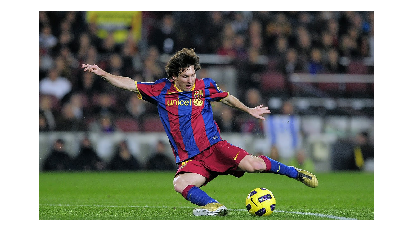

In [98]:
I = cv2.imread('messi.jpg')
plt.axis('off')
imshow(I)

(1000, 1600, 3)


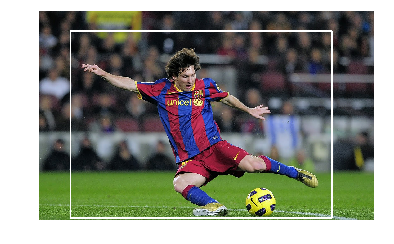

In [99]:
# Find rectangle
I2 = I.copy()
print(I2.shape)
# cv2.rectangle(I2, (150, 100), (1400, 990), (255, 255, 255), 5)
cv2.rectangle(I2, (150, 100, 1250, 890), (255, 255, 255), 5)
imshow(I2)

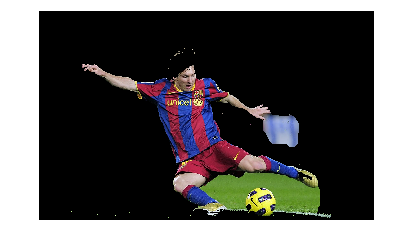

In [100]:
mask = np.zeros(I.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (150, 100, 1250, 890)
cv2.grabCut(I,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
output = I*mask2[:,:,np.newaxis]
imshow(output)

In [101]:
cv2.imwrite('messi_iter1.jpg', output)

True

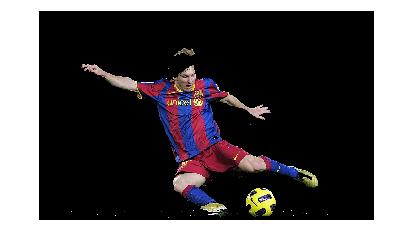

In [102]:
# newmask is the mask image I manually labelled
newmask = cv2.imread('messi_mask1.png')
# wherever it is marked white (sure foreground), change mask=1
# wherever it is marked black (sure background), change mask=0
mask[newmask[:, :, 2] == 255] = 0
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
# # mask[newmask == 255] = 1
cv2.grabCut(I,mask,None,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_MASK)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
output = I*mask2[:,:,np.newaxis]
imshow(output)

In [103]:
cv2.imwrite('messi_iter2.jpg', output)

True

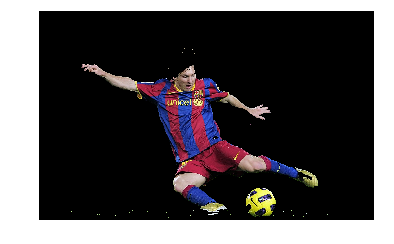

In [104]:
newmask2 = cv2.imread('messi_mask2.png')
mask[newmask2[:, :, 2] == 255] = 0
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
mask, bgdModel, fgdModel = cv2.grabCut(I,mask,None,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_MASK)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
output = I*mask2[:,:,np.newaxis]
imshow(output)

In [105]:
cv2.imwrite('messi_iter3.jpg', output)

True

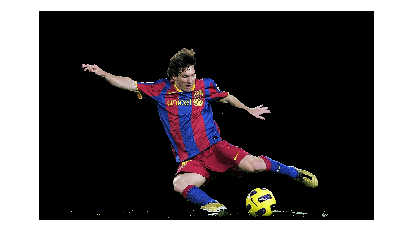

In [106]:
newmask3 = cv2.imread('messi_mask3.png')
mask[newmask3[:, :, 2] == 255] = 0
mask[newmask3[:, :, 1] == 255] = 1
# mask[:] = 1
mask, bgdModel, fgdModel = cv2.grabCut(I,mask,None,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_MASK)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
output = I*mask2[:,:,np.newaxis]
imshow(output)

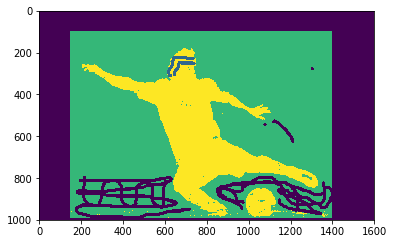

In [107]:
plt.imshow(mask)

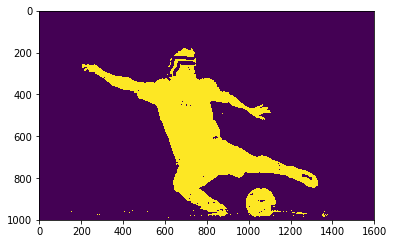

In [114]:
plt.imshow(mask==3)

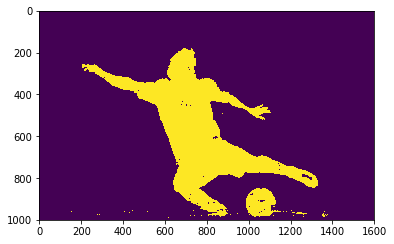

In [108]:
plt.imshow(mask2)

In [115]:
cv2.imwrite('messi_iter4.jpg', output)

True